# Andrew Ng Coursera Machine Learning Course - Ex 2
**Dean's Reimplementation Attempt**

*9/25/2017*

Note: See [here](https://docs.scipy.org/doc/scipy/reference/api.html#guidelines-for-importing-functions-from-scipy) for recommendations on how to import `scipy` modules.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# Note: If comment out %matplotlib inline, can still call plt.show()
%matplotlib inline

## 1. Logistic Regression
**Note:** This is a classification algorithm, despite the term "regression" in the name.  Classification means outputs $y$ take on discrete values, for example $y \in \{0,1\}$.  The output is  also known as a *label*.

*Sigmoid function*, aka *logistic function*

$$ g(z) = \frac{1}{1 + e^{-z}}$$

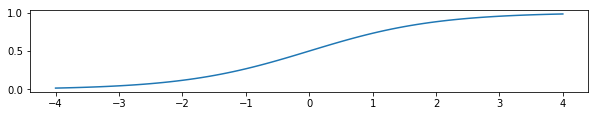

In [74]:
z = np.linspace(-4, 4, 81)
g = 1 / (1 + np.exp(-z))
plt.figure(figsize=(10, 1.5))
plt.plot(z, g)

For the hypothesis, use:

$$z = \theta^Tx$$

$$h_\theta(x) = g(z) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}} $$

... making $h_\theta(x)$ the probability that the output is 1, not 0.

$$h_\theta(x) = P(y=1 \: | \: x;\theta) $$

For the decision boundary, if $h_\theta(x) \ge 0.5$, predict $y = 1$.  This happens when $z \ge 0$.

For the cost function, use:

$$\text{Cost}(h_\theta(x), y) = - \log_e(h_\theta(x)) \qquad\qquad \text{if} \, y=1 $$
$$\text{Cost}(h_\theta(x), y) = - \log_e(1 - h_\theta(x)) \qquad \text{if} \, y=0 $$
$$J(\theta) = \frac{1}{m} \sum_{i=1}^m \text{Cost}\left(h_\theta(x^{(i)}, y^{(i)}\right) $$

...so...

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ 
y^{(i)} \log(h_\theta(x^{(i)}))
+ (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right] $$

Vectorized, this is:
$$J(\theta) = \frac{1}{m} \left( -y^\top\log(h) - (1-y)^\top\log(1-h) \right) $$

The gradient is:
$$\frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

So the gradient descent rule is:

$$\theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$
...which *looks* the same as for linear regression, but remember that $h_\theta(x^{(i)})$ is the sigmoid function this time.

## 1.1 Visualizing the data

See [numpy.matmul() documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) for how a 1-D numpy array is treated by matrix multiplication.  

Basically, given vector v and matrix M, in **`v@M`** the v is treated as a row vector, but in **`M@v`** the v is treated as a column vector.

In [76]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]    # y = data[:, 2:3] for 1-column 2-d array.
print(data.shape)
print(X.shape)
print(y.shape)
print(data[:5])
print(X[:5])
print(y[:5])

(100, 3)
(100, 2)
(100,)
[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]
[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]
[ 0.  0.  0.  1.  1.]


In [77]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)

    # Save lists of "lines" created (l1...) for the legend below.
    l1 = plt.plot(X[pos, 0], X[pos, 1], 'k+', label='Admitted')
    l2 = plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')

    # plt.legend() puts one legend entry for each data point,
    # so pick just the first point from each class and specify those.
    plt.legend((l1[0], l2[0]), (l1[0].get_label(), l2[0].get_label()))

    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
    # plt.show() # Commented in case want to add more before showing.

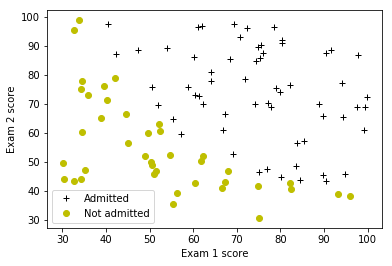

In [80]:
plotData(X, y)
# with %matplotlib inline, shows automatically at end of cell.

# 1.2. Implementation

In [81]:
# Add the intercept/bias term of all 1's to X.
m = X.shape[0]
ones = np.ones((m, 1))
X = np.hstack((ones, X))
print(X[:5])

[[  1.          34.62365962  78.02469282]
 [  1.          30.28671077  43.89499752]
 [  1.          35.84740877  72.90219803]
 [  1.          60.18259939  86.3085521 ]
 [  1.          79.03273605  75.34437644]]


## 1.2.1. Warmup exercise: sigmoid function
*Sigmoid function*, aka *logistic function*

$$ g(z) = \frac{1}{1 + e^{-z}}$$

In [82]:
# Student implements...
def sigmoid(X):
    g = 1 / (1 + np.exp(-X))
    return g

## 1.2.2. Cost function and gradient

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m \left[ 
y^{(i)} \log(h_\theta(x^{(i)}))
+ (1-y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right] $$

$$\frac{\partial}{\partial\theta_j} = \frac{1}{m} \sum_{i=1}^m
  \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

In [83]:
initial_theta = np.zeros(X.shape[1]) # np.zeros((X.shape[1], 1)), for n x 1 2d array
initial_theta

array([ 0.,  0.,  0.])

In [84]:
# Student implements...
def costFunction(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X @ theta) # Not theta @ X.T because I wanted samples in rows.

    Jsumofones = y.T @ np.log(h) 
    Jsumofzeros = (1-y).T @ np.log(1-h)
    J = (-1/m) * (Jsumofones + Jsumofzeros)
    
    grad = (1/m) * X.T @ (h - y)

    return J, grad

In [85]:
cost, grad = costFunction(initial_theta, X, y)

In [86]:
# Expected 0.693, and [-0.1, -12.0092, -11.2628]
print(cost) # 1-d vector input made this a scalar, not a 2-d array.
print(grad) # 1-d vector input etc made this a 1-d array, not a 2-d array.

0.69314718056
[ -0.1        -12.00921659 -11.26284221]


In [87]:
# Extra parentheses and commas would make the following a column vector.
#test_theta = np.array(((-24,), (0.2,), (0.2,)))
test_theta = np.array((-24, 0.2, 0.2))
print(test_theta.shape)
cost, grad = costFunction(test_theta, X, y)

(3,)


In [88]:
# Expected cost (approx): 0.218
# Expected gradients (approx):  0.043, 2.566, 2.647');
print(cost) # Should this be coming out as a scalar, not a 2-d array?
print(grad) # Should this be coming out as a 1-d array, not a 2-d array?

0.218330193827
[ 0.04290299  2.56623412  2.64679737]


### 1.2.3. Learning parameters using `scipy.optimize.minimize`

In [89]:
initial_theta = np.zeros([X.shape[1]])
initial_theta = test_theta

`scipy.optimize.minimize()` calls back to the objective function with only the parameter vector being optimized (in our case, `theta`).  So we need to make a partial function that only accepts `theta` and already has `X` and `y` "baked in".  We can do this as separate function definition or as a lambda.  We choose a lambda like Andrew Ng's original does in Octave/Matlab with the `@(t) (costFunction(t, X, y))` syntax.

Note: The word "partial" here has to do with partial as a functional programming concept, not partial derivatives.

Note2: It would have been nice to do this with the `partial()` function in the `functools` module, but I don't think the original order of parameters allows that.

In [90]:
%%time
# Note: Was using fminunc() in MatLab
result = optimize.minimize(
    lambda t: costFunction(t, X, y), 
    initial_theta, 
    jac=True, 
    options={'maxiter':100, 'disp':True}
    )

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 16
         Function evaluations: 22
         Gradient evaluations: 22
Wall time: 3.97 ms


In [91]:
# The non-lambda way to make a cost function to pass to optimize.minimize()
#def costFun(theta):
#    J, grad = costFunction(theta, X, y)
#    return J, grad
#    # return J[0], grad[:,0] # This was if using 2-d theta input.

In [92]:
result

      fun: 0.2034977015894421
 hess_inv: array([[  3.33350099e+03,  -2.66055767e+01,  -2.69764676e+01],
       [ -2.66055767e+01,   2.27032698e-01,   2.02191103e-01],
       [ -2.69764676e+01,   2.02191103e-01,   2.33923485e-01]])
      jac: array([ -1.29877864e-08,  -9.15436295e-07,  -7.66847116e-07])
  message: 'Optimization terminated successfully.'
     nfev: 22
      nit: 16
     njev: 22
   status: 0
  success: True
        x: array([-25.16133175,   0.2062317 ,   0.20147159])

In [93]:
# Print theta to screen
print('Cost at theta found by optimize: %s' % result.fun)
print('Expected cost (approx):          0.203')
print('theta:                           %s' % result.x)
print('Expected theta (approx):         -25.161, 0.206, 0.201')

Cost at theta found by optimize: 0.2034977015894421
Expected cost (approx):          0.203
theta:                           [-25.16133175   0.2062317    0.20147159]
Expected theta (approx):         -25.161, 0.206, 0.201


In [94]:
theta = result.x

### 1.2.4. Evaluating Logistic Regression
TODO: Graph decision boundary.

In [95]:
def plotDecisionBoundary(theta, X, y):
    # First plot the data, taking into account we added intercept term.
    plotData(X[:,1:], y)

    # Choose two endpoints for decision boundary.
    plot_x = np.array((min(X[:,1]) - 2, max(X[:,1]) + 2))

    # Calculate y values at that list of endpoints
    plot_y = (-1 / theta[2]) * (theta[1]*plot_x + theta[0])

    plt.plot(plot_x, plot_y)

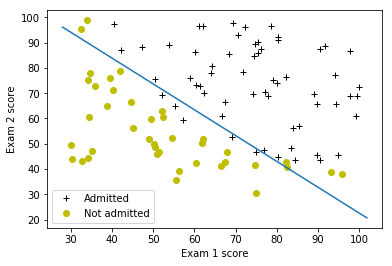

In [96]:
plotDecisionBoundary(theta, X, y)

Try predicting one student.

In [97]:
theta = result.x
#X_one = np.array(((1, 45, 85), ))
X_one = np.array((1, 45, 85))
h_one = sigmoid(X_one @ theta)
h_one

0.77629064887795896

In [98]:
# Hmmm.
print('For scores 45 and 85, we predict admission probability %f' % h_one)
print('Expected value: 0.775 +/- 0.002')

For scores 45 and 85, we predict admission probability 0.776291
Expected value: 0.775 +/- 0.002


Now check overall accuracy on the data we trained on.

In [99]:
# Student implements...
def predict(theta, X):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(np.float)
#predict(theta, X)

In [104]:
p = predict(theta, X)
accuracy = (p == y).astype(np.float).mean()

print('Train Accuracy: %f%%' % (accuracy * 100));
print('Expected accuracy (approx): 89.0');

Train Accuracy: 89.000000%
Expected accuracy (approx): 89.0


# 2. Regularized Logistic Regression

In [105]:
data = np.loadtxt('ex2/ex2data2.txt', delimiter=',')
X = data[:, 0:-1]
y = data[:, -1]
print(data[:5])
print(X[:5])
print(y[:5])

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]
[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[ 1.  1.  1.  1.  1.]


In [106]:
pos = np.where(y == 1)
neg = np.where(y == 0)

## 2.1. Visualizing the data

** PROBLEM? ** Why does this plot look different than Ex2.pdf handout?

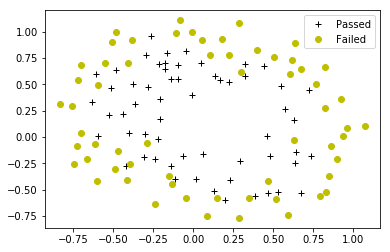

In [107]:
l1 = plt.plot(X[pos, 0], X[pos, 1], 'k+', label='Passed')
l2 = plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Failed')
plt.legend((l1[0], l2[0]), (l1[0].get_label(), l2[0].get_label()))

## 2.2. Feature mapping

In addition to adding the bias term of 1's, we map the 2 features into a bunch of features that include higher order polynomials of those two features.  This lets us fit more complex functions, although it is more prone to overfitting as well.

In [108]:
###
# Add leading 1's column for intercept/bias term, and add 
# polynomial terms, but only for two starting features x1 & x2.
def mapFeature(x1, x2, degree=6, bias=True):

    # Calculate total number of terms. (Is there a more general way?)
    cols = degree * (degree + 3) // 2
    if bias:
        cols += 1

    # Allocate uninitialized array
    out = np.empty((len(x1), cols))
    nextcol = 0
    
    # Add bias term if requested
    if bias:
        out[:, nextcol] = 1
        nextcol += 1

    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            out[:, nextcol] = (x1 ** (i-j)) * (x2 ** j)
            nextcol += 1

    return out

In [109]:
print(X.shape)
print(X[:2])
X = mapFeature(X[:,0], X[:,1])
print(X.shape)
print(X[:2])

(118, 2)
[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]]
(118, 28)
[[  1.00000000e+00   5.12670000e-02   6.99560000e-01   2.62830529e-03
    3.58643425e-02   4.89384194e-01   1.34745327e-04   1.83865725e-03
    2.50892595e-02   3.42353606e-01   6.90798869e-06   9.42624411e-05
    1.28625106e-03   1.75514423e-02   2.39496889e-01   3.54151856e-07
    4.83255257e-06   6.59422333e-05   8.99809795e-04   1.22782870e-02
    1.67542444e-01   1.81563032e-08   2.47750473e-07   3.38066048e-06
    4.61305487e-05   6.29470940e-04   8.58939846e-03   1.17205992e-01]
 [  1.00000000e+00  -9.27420000e-02   6.84940000e-01   8.60107856e-03
   -6.35227055e-02   4.69142804e-01  -7.97681228e-04   5.89122275e-03
   -4.35092419e-02   3.21334672e-01   7.39785525e-05  -5.46363780e-04
    4.03513411e-03  -2.98012201e-02   2.20094970e-01  -6.86091891e-06
    5.06708697e-05  -3.74226408e-04   2.76382476e-03  -2.04120477e-02
    1.50751849e-01   6.36295342e-07  -4.69931780e-06   3.47065055e-05
   -2.56322636e-04   1.

# 2.3. Cost function and gradient

In [110]:
# Initialize parameters and lambda, but
# lambda is a keyword in python, so we call the variable lamb.
initial_theta = np.zeros(X.shape[1])
lamb = 1;

In [ ]:
# Student implements cost function with regularzation
def costFunctionReg(initial_theta, X, y, lamb):
    pass

In [ ]:
cost, grad = costFunctionReg(initial_theta, X, y, lamb)
print('Cost at initial theta (zeros): ', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
print(grad[:5])
print('Expected gradients (approx) - first five values only:')
print('0.0085, 0.0188, 0.0001, 0.0503, 0.0115')
